CNN notebook © Arkaprabha Majumdar

So, once we learned how to build an initial CNN structure, let's try and apply it to Handwrittten Digit Recognition

In [ ]:
from keras.datasets import mnist #popular image dataset

(x_train,y_train),(x_test,y_test) = mnist.load_data() #import the data

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


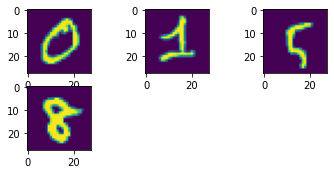

In [ ]:
#Now we can plot the data from x_train as overview
#For visualization, we can use either OpenCV, which will open in a new window
# Or we can use matplotlib

import matplotlib.pyplot as plt

plt.subplot(331)
plt.imshow(x_train[1])

plt.subplot(332)
plt.imshow(x_train[24])

plt.subplot(333)
plt.imshow(x_train[100])

plt.subplot(334)
plt.imshow(x_train[2400])

plt.show()

In [ ]:
#Now we know how the images look, so we need to feed into keras
x_train.shape

(60000, 28, 28)

We need to add another dimension to this because it is the format of keras input

In [ ]:
x_train = x_train.reshape(x_train.shape + (1,))
x_train.shape

(60000, 28, 28, 1)

If image is grayscale, then value is 1. If image is color, then value is 3

In [ ]:
x_test = x_test.reshape(x_test.shape + (1,))

input_shape = (28,28,1)

#then we change all values to float so we can normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#and Normalize
x_train /= 255
x_test /= 255

In [ ]:
#One Hot encoding on data layers
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)

y_test = np_utils.to_categorical(y_test)

**#Next we build our CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential() #initialize model

model.add(Conv2D(32,(3,3),activation='relu',input_shape = input_shape)) #conv layer 1

model.add(Conv2D(64,(3,3),activation='relu')) #conv layer 2

model.add(MaxPooling2D((2,2))) #pooled layer with 2x2 kernel

model.add(Flatten())

model.add(Dense(128,activation = 'relu')) #FC layer 1

model.add(Dropout(0.5)) #dropout layer for regularization

model.add(Dense(10,activation='softmax')) #num_classes = 10 digits

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
from keras.optimizers import sgd

model.compile(loss='categorical_crossentropy',
              optimizer = sgd(0.01),
              metrics = ['accuracy'])

**The model is finally compiled and ready to use.**

We can already see the advantages of keras with this huge number of parameters.

In [11]:
#So now we train our model
batch_size = 32 #depending on system specs

epochs = 5 #10 is a good enoough number

history = model.fit(x_train,y_train,
                    batch_size, epochs,
                    verbose = 1,
                    validation_data = (x_test,y_test))

score = model.evaluate(x_test,y_test, verbose = 0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1318 - accuracy: 0.9617 - val_loss: 0.0670 - val_accuracy: 0.9789
Epoch 2/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1168 - accuracy: 0.9653 - val_loss: 0.0571 - val_accuracy: 0.9832
Epoch 3/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1013 - accuracy: 0.9698 - val_loss: 0.0517 - val_accuracy: 0.9835
Epoch 4/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0913 - accuracy: 0.9725 - val_loss: 0.0515 - val_accuracy: 0.9842
Epoch 5/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.0478 - val_accuracy: 0.9852


In [ ]:
#And now if, say, we run it with changing batch sizes and for 10-20 epochs, we'll get an accuracy of ~99+%
print('final test loss',score[0])

print('final test accuracy',score[1])

final test loss 0.07971831686645746
final test accuracy 0.9747999906539917


**So, let's plot the loss and accuracy**

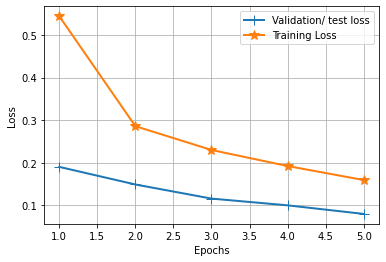

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict ['val_loss']

epochs = range(1,6)

line1 = plt.plot (epochs,val_loss_values,
                  label = 'Validation/ test loss')

line2 = plt.plot (epochs,loss_values,
                  label = 'Training Loss')

plt.setp(line1,linewidth = 2.0,
         marker = '+' , markersize = 10.0)

plt.setp(line2,linewidth = 2.0,
         marker = '*' , markersize = 10.0)

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.grid(True)

plt.legend()

plt.show()

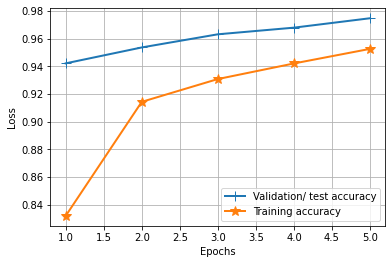

In [ ]:
history_dict = history.history

acc_values = history_dict['accuracy']

val_acc_values = history_dict ['val_accuracy']

epochs = range(1,6)

line1 = plt.plot (epochs,val_acc_values,
                  label = 'Validation/ test accuracy')

line2 = plt.plot (epochs,acc_values,
                  label = 'Training accuracy')

plt.setp(line1,linewidth = 2.0,
         marker = '+' , markersize = 10.0)

plt.setp(line2,linewidth = 2.0,
         marker = '*' , markersize = 10.0)

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.grid(True)

plt.legend()

plt.show()

In [ ]:
history_dict

{'accuracy': [0.83196664, 0.9144, 0.93086666, 0.9421333, 0.95266664],
 'loss': [0.5440591096818447,
  0.28580461386442185,
  0.2299203879604737,
  0.19223401961376269,
  0.15932248880006372],
 'val_accuracy': [0.9422000050544739,
  0.9537000060081482,
  0.9631999731063843,
  0.9679999947547913,
  0.9747999906539917],
 'val_loss': [0.1901691490918398,
  0.14885753647908567,
  0.115700524828583,
  0.09986537350043655,
  0.07971831686645746]}

In [ ]:
#Let's save our model:
from google.colab import drive
drive.mount('/gdrive')
%cd ..

Mounted at /gdrive
/


In [12]:
model.save('/content/drive/My Drive/Colab Notebooks/CNNs/models/mnist_digit_recognition_5_epoch_cnn.h5')

In [ ]:
!pwd

/gdrive/My Drive/Colab Notebooks/CNNs/models


In [ ]:
from keras.models import load_model

classifier = load_model("/content/drive/My Drive/Colab Notebooks/CNNs/models/mnist_digit_recognition_5_epoch_cnn.h5")

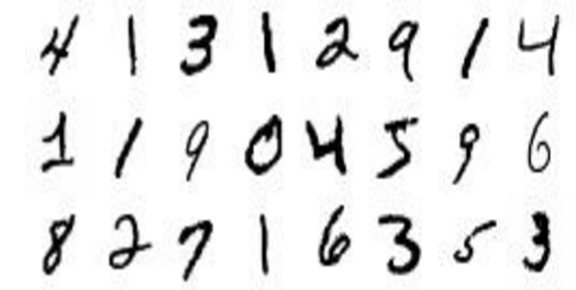

In [ ]:
import cv2
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

req = urllib.request.urlopen('https://databricks.com/wp-content/uploads/2016/05/handwritten-digits.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)[:,300:]
cv2_imshow(img)

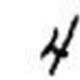

In [ ]:
cv2_imshow(img[0:80,0:80])

We can upload any digit image off the internet, but we need to invert the image and dilate it a little to make it clearer

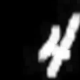

4

In [ ]:
four=img[0:80,0:80]
kernel = np.ones((5,5),np.uint8)
four = cv2.dilate(cv2.bitwise_not(four),kernel,1)
cv2_imshow(four)
classifier.predict_classes(cv2.resize(four,(28,28)).reshape(1,28,28,1))[0]

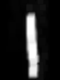

1

In [ ]:
one=img[0:80,100:160]
kernel = np.ones((5,5),np.uint8)
one = cv2.dilate(cv2.bitwise_not(one),kernel,1)
cv2_imshow(one)
classifier.predict_classes(cv2.resize(one,(28,28)).reshape(1,28,28,1))[0]

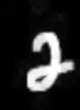

2

In [ ]:
two=img[180:300,80:160]
kernel = np.ones((5,5),np.uint8)
two = cv2.dilate(cv2.bitwise_not(two),kernel,1)
cv2_imshow(two)
classifier.predict_classes(cv2.resize(two,(28,28)).reshape(1,28,28,1))[0]